# Chapter 1 - Simple Regression Problem

In [52]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
device

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Synthetic Data Generation

Text(0.5, 1.0, 'Training and Test Data')

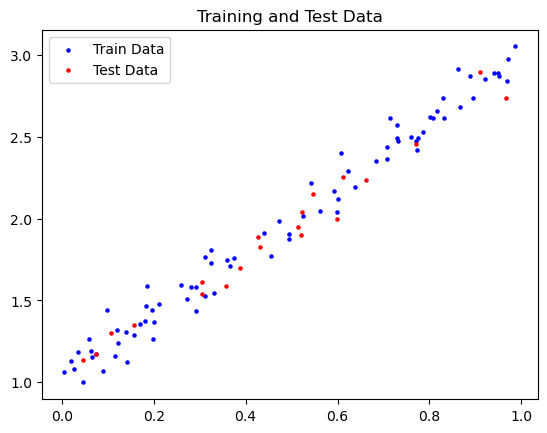

In [53]:
# Syntetic Data Generation
true_b = 1
true_w = 2
N = 100

x = np.random.rand(N, 1)
epsilon = (0.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Training set 80%
train_idx = idx[:int(N*.8)]
# Test set 20%
test_idx = np.setdiff1d(idx, train_idx)

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# graph test data
plt.scatter(x[train_idx], y[train_idx], color='blue', s=5)
plt.scatter(x[test_idx], y[test_idx], color='red', s=5)
plt.legend(['Train Data', 'Test Data'])
plt.title('Training and Test Data')

In [54]:
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)
x_train.dtype, x_train_tensor.dtype, x_train_tensor.type(), y_train_tensor.type()

(dtype('float64'),
 torch.float32,
 'torch.mps.FloatTensor',
 'torch.mps.FloatTensor')

## Creating Parameter Tensors

In [55]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)
b, w

(tensor([0.9047], device='mps:0', requires_grad=True),
 tensor([-1.5057], device='mps:0', requires_grad=True))

## Autograd

In [56]:
# Forward Pass
yhat = b + w * x_train_tensor

# Loss Function
error = yhat - y_train_tensor
loss = (error**2).mean()
loss.backward()

print('b:', b.grad, 'w:', w.grad)
b.grad.zero_()
w.grad.zero_()

b: tensor([-3.5210], device='mps:0') w: tensor([-2.3152], device='mps:0')


tensor([0.], device='mps:0')

# Dynamic Computation Graph

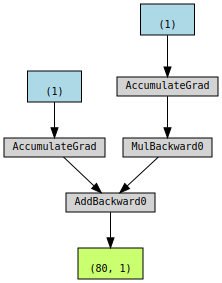

In [57]:
# Parameters
b = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)

# Forward Pass
yhat = b + w * x_train_tensor

# Loss Function
error = yhat - y_train_tensor
loss = (error ** 2).mean()

# Plotting Dynamic Graph
make_dot(yhat)

# Batch Gradient Descent

In [58]:
lr = 0.1
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)

optimizer = optim.SGD([b, w], lr=lr)

loss_fn = nn.MSELoss(reduction='mean')

N_EPOCHS = 1000
for epoch in range(N_EPOCHS):
    
    # Forward Pass
    yhat = b + w * x_train_tensor

    # Loss Function
    loss = loss_fn(yhat, y_train_tensor)

    # Compute Gradients
    loss.backward()

    # Update Weights
    optimizer.step()

    # Zero the gradients
    optimizer.zero_grad()

    print(f'Epoch: {epoch} | Loss: {loss.item()} | b: {b.item()} | w: {w.item()}')

Epoch: 0 | Loss: 4.239456653594971 | b: 1.2567734718322754 | w: -1.2741389274597168
Epoch: 1 | Loss: 2.681732654571533 | b: 1.5165735483169556 | w: -1.0905704498291016
Epoch: 2 | Loss: 1.793040156364441 | b: 1.7070679664611816 | w: -0.9431889057159424
Epoch: 3 | Loss: 1.2826480865478516 | b: 1.8455370664596558 | w: -0.8231512308120728
Epoch: 4 | Loss: 0.9862678647041321 | b: 1.9449697732925415 | w: -0.7238079309463501
Epoch: 5 | Loss: 0.8110575079917908 | b: 2.0151288509368896 | w: -0.6401584148406982
Epoch: 6 | Loss: 0.7045478820800781 | b: 2.06335186958313 | w: -0.5684415698051453
Epoch: 7 | Loss: 0.6370840072631836 | b: 2.09515380859375 | w: -0.5058281421661377
Epoch: 8 | Loss: 0.5919016599655151 | b: 2.1146788597106934 | w: -0.4501892924308777
Epoch: 9 | Loss: 0.5595216155052185 | b: 2.1250414848327637 | w: -0.39992281794548035
Epoch: 10 | Loss: 0.5345811247825623 | b: 2.1285817623138428 | w: -0.3538223206996918
Epoch: 11 | Loss: 0.5140436291694641 | b: 2.1270577907562256 | w: -0.3

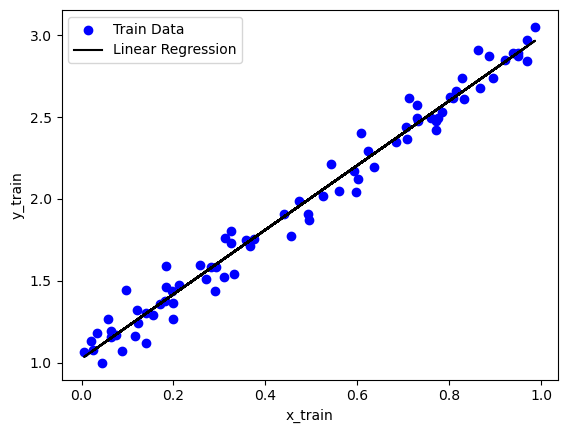

In [59]:
# Plot the linear regression line along with the original train dataset
plt.scatter(x_train, y_train, color="blue", label="Train Data")
plt.plot(
    x_train,
    b.detach().cpu().numpy() + w.detach().cpu().numpy() * x_train,
    color="black",
    label="Linear Regression",
)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.legend()
plt.show()

# Simple Regression Model

In [60]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model = ManualLinearRegression().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction="mean")
loss_fn_min_error = 0.001

display(model.state_dict(), optimizer.state_dict())

N_EPOCHS = 1000
for epoch in range(N_EPOCHS):
    model.train()

    # Forward Pass
    yhat = model(x_train_tensor)

    # Loss Function
    loss = loss_fn(yhat, y_train_tensor)

    # Compute Gradients
    loss.backward()

    # Update Weights
    optimizer.step()

    # Zero the gradients
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss.item()} | weight: {model.linear.weight.item()} | bias: {model.linear.bias.item()}"
        )

OrderedDict([('linear.weight', tensor([[0.7645]], device='mps:0')),
             ('linear.bias', tensor([0.8300], device='mps:0'))])

{'state': {0: {'step': tensor(0.), 'sum': tensor([[0.]], device='mps:0')},
  1: {'step': tensor(0.), 'sum': tensor([0.], device='mps:0')}},
 'param_groups': [{'lr': 0.1,
   'lr_decay': 0,
   'eps': 1e-10,
   'weight_decay': 0,
   'initial_accumulator_value': 0,
   'foreach': None,
   'maximize': False,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

Epoch: 0 | Loss: 0.7255968451499939 | weight: 0.8645385503768921 | bias: 0.9300079345703125
Epoch: 10 | Loss: 0.10446160286664963 | weight: 1.185990810394287 | bias: 1.224251389503479
Epoch: 20 | Loss: 0.05350430682301521 | weight: 1.301823616027832 | bias: 1.2947713136672974
Epoch: 30 | Loss: 0.04254722222685814 | weight: 1.3678913116455078 | bias: 1.3084466457366943
Epoch: 40 | Loss: 0.03752394765615463 | weight: 1.4148674011230469 | bias: 1.3020299673080444
Epoch: 50 | Loss: 0.03378790244460106 | weight: 1.4532729387283325 | bias: 1.2887911796569824
Epoch: 60 | Loss: 0.030618423596024513 | weight: 1.4870762825012207 | bias: 1.2736865282058716
Epoch: 70 | Loss: 0.027861004695296288 | weight: 1.517866611480713 | bias: 1.2585420608520508
Epoch: 80 | Loss: 0.025449950248003006 | weight: 1.5463374853134155 | bias: 1.2440017461776733
Epoch: 90 | Loss: 0.02333851531147957 | weight: 1.5728380680084229 | bias: 1.230265498161316
Epoch: 100 | Loss: 0.021487854421138763 | weight: 1.597578525543

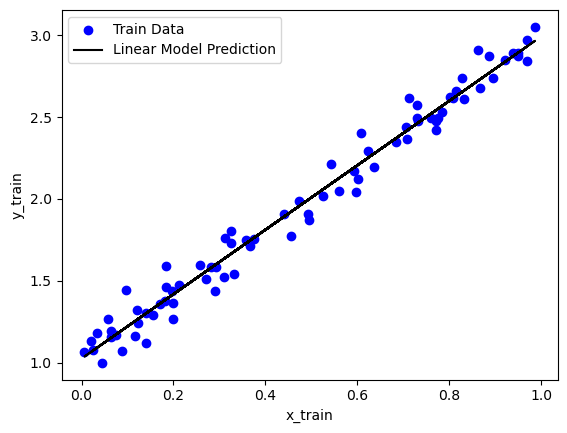

In [61]:
# Plot the linear regression line along with the original train dataset
plt.scatter(x_train, y_train, color="blue", label="Train Data")
plt.plot(
    x_train,
    model.linear.bias.detach().cpu().numpy()
    + model.linear.weight.detach().cpu().numpy() * x_train,
    color="black",
    label="Linear Model Prediction",
)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.legend()
plt.show()

# Sequential Models

In [62]:
model = nn.Sequential().to(device)
model.add_module("layer1", nn.Linear(3, 5))
model.add_module("layer2", nn.Linear(5, 1))
model.to(device)
display(model.state_dict())



OrderedDict([('layer1.weight',
              tensor([[-0.1353,  0.5304, -0.1265],
                      [ 0.1165, -0.2811,  0.3391],
                      [ 0.5090, -0.4236,  0.5018],
                      [ 0.1081,  0.4266,  0.0782],
                      [ 0.2784, -0.0815,  0.4451]], device='mps:0')),
             ('layer1.bias',
              tensor([ 0.0853, -0.2695,  0.1472, -0.2660, -0.0677], device='mps:0')),
             ('layer2.weight',
              tensor([[-0.1816,  0.2967, -0.3530, -0.2062, -0.1263]], device='mps:0')),
             ('layer2.bias', tensor([-0.2689], device='mps:0'))])